In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn import svm
import keras

best_svm = svm.SVC(C=5, kernel='sigmoid', tol=0.001)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/Edge-IIoT/pre_train/SVM.joblib")

model = best_svm

2024-04-16 21:22:32.213962: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:22:32.217822: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:22:32.266446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:22:33.218221: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


epsilon = 0.01
FPR: [0.01101377 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97729618 1.        ]
FNR: [0.24561404 0.         0.02270382 0.        ]
TNR: [0.98898623 1.         0.98114901 1.        ]
Accuracy: 0.9793566970715314
Precision(micro,macro,weighted): 0.9793566970715314,0.93099263125209,0.9794683826429379
F1(micro,macro,weighted: 0.9793566970715314,0.9319501806917914,0.9794113779939432
Recall(micro,macro,weighted: 0.9793566970715314,0.932920536635707,0.9793566970715314
FPR: 0.007466188660421577
tpr: 0.932920536635707
fnr: 0.06707946336429309
tnr: 0.9925338113395785


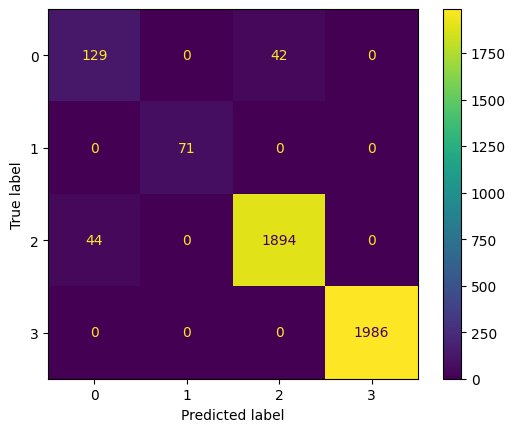

epsilon = 0.1
FPR: [0.01401752 0.         0.02558348 0.        ]
TPR: [0.66666667 1.         0.97110423 1.        ]
FNR: [0.33333333 0.         0.02889577 0.        ]
TNR: [0.98598248 1.         0.97441652 1.        ]
Accuracy: 0.9728756601056169
Precision(micro,macro,weighted): 0.9728756601056169,0.9102979097776294,0.9728036449427455
F1(micro,macro,weighted: 0.9728756601056169,0.9098688634453733,0.9728393864555902
Recall(micro,macro,weighted: 0.9728756601056169,0.9094427244582043,0.9728756601056169
FPR: 0.009900251211680668
tpr: 0.9094427244582043
fnr: 0.09055727554179566
tnr: 0.9900997487883194


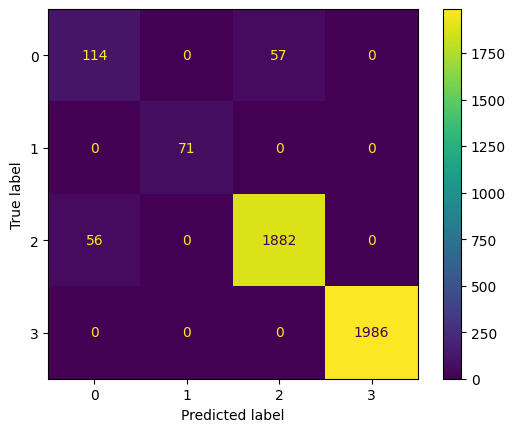

epsilon = 0.2
FPR: [0.02002503 0.         0.07181329 0.        ]
TPR: [0.06432749 1.         0.95872033 1.        ]
FNR: [0.93567251 0.         0.04127967 0.        ]
TNR: [0.97997497 1.         0.92818671 1.        ]
Accuracy: 0.942390782525204
Precision(micro,macro,weighted): 0.942390782525204,0.7603981746697307,0.9270315034676778
F1(micro,macro,weighted: 0.942390782525204,0.7558255312251562,0.934177981818503
Recall(micro,macro,weighted: 0.942390782525204,0.7557619539043687,0.942390782525204
FPR: 0.02295957918673027
tpr: 0.7557619539043687
fnr: 0.2442380460956312
tnr: 0.9770404208132697


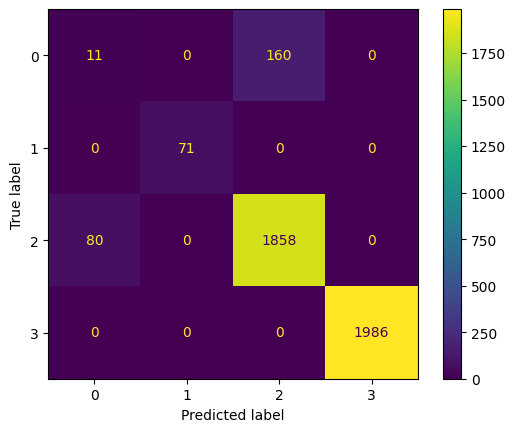

epsilon = 0.3
FPR: [0.02803504 0.         0.07001795 0.        ]
TPR: [0.0877193  1.         0.94220846 1.        ]
FNR: [0.9122807  0.         0.05779154 0.        ]
TNR: [0.97196496 1.         0.92998205 1.        ]
Accuracy: 0.9356697071531445
Precision(micro,macro,weighted): 0.9356697071531445,0.7598504652105167,0.9271867544191912
F1(micro,macro,weighted: 0.9356697071531445,0.7580759485002054,0.9312815282605195
Recall(micro,macro,weighted: 0.9356697071531445,0.7574819401444789,0.9356697071531445
FPR: 0.0245132492815301
tpr: 0.7574819401444789
fnr: 0.24251805985552113
tnr: 0.9754867507184699


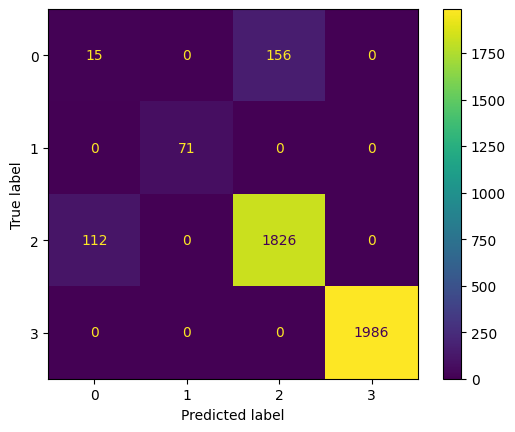

epsilon = 0.01
FPR: [0.01101377 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97729618 1.        ]
FNR: [0.24561404 0.         0.02270382 0.        ]
TNR: [0.98898623 1.         0.98114901 1.        ]
Accuracy: 0.9793566970715314
Precision(micro,macro,weighted): 0.9793566970715314,0.93099263125209,0.9794683826429379
F1(micro,macro,weighted: 0.9793566970715314,0.9319501806917914,0.9794113779939432
Recall(micro,macro,weighted: 0.9793566970715314,0.932920536635707,0.9793566970715314
FPR: 0.007466188660421577
tpr: 0.932920536635707
fnr: 0.06707946336429309
tnr: 0.9925338113395785


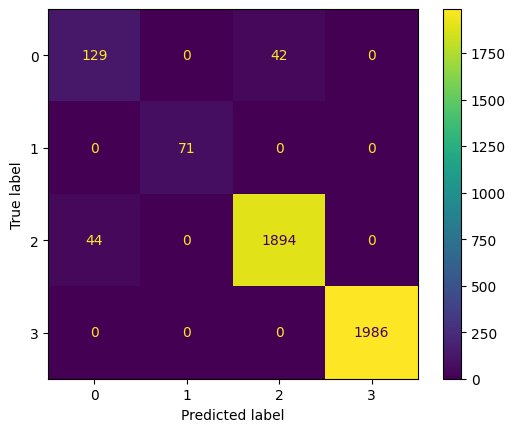

epsilon = 0.1
FPR: [0.01426783 0.         0.01929982 0.        ]
TPR: [0.74853801 1.         0.97058824 1.        ]
FNR: [0.25146199 0.         0.02941176 0.        ]
TNR: [0.98573217 1.         0.98070018 1.        ]
Accuracy: 0.9759961593855017
Precision(micro,macro,weighted): 0.9759961593855017,0.9173856548856549,0.9769564627221853
F1(micro,macro,weighted: 0.9759961593855017,0.9233019510179856,0.9764246372775244
Recall(micro,macro,weighted: 0.9759961593855017,0.929781561747506,0.9759961593855017
FPR: 0.008391913815069554
tpr: 0.929781561747506
fnr: 0.07021843825249398
tnr: 0.9916080861849305


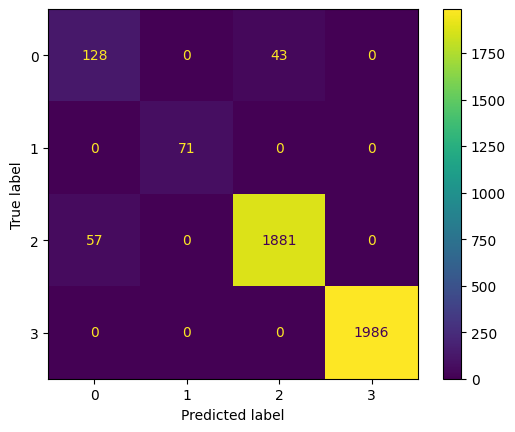

epsilon = 0.2
FPR: [0.01852315 0.         0.05924596 0.        ]
TPR: [0.22807018 1.         0.96181631 1.        ]
FNR: [0.77192982 0.         0.03818369 0.        ]
TNR: [0.98147685 1.         0.94075404 1.        ]
Accuracy: 0.9505520883341335
Precision(micro,macro,weighted): 0.9505520883341335,0.8197501197084434,0.9423555858035836
F1(micro,macro,weighted: 0.9505520883341335,0.8055709703058207,0.9458673415528837
Recall(micro,macro,weighted: 0.9505520883341335,0.7974716202270382,0.9505520883341335
FPR: 0.01944227861128026
tpr: 0.7974716202270382
fnr: 0.20252837977296181
tnr: 0.9805577213887198


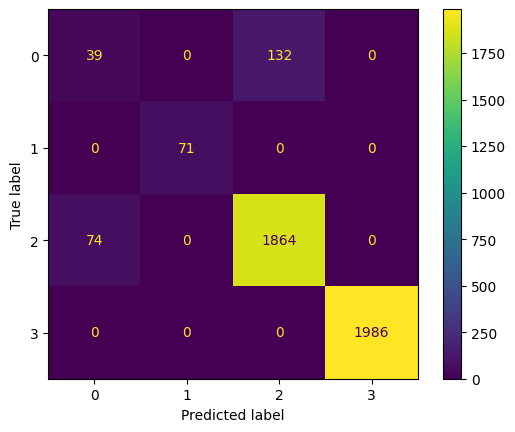

epsilon = 0.3
FPR: [0.02553191 0.         0.06822262 0.        ]
TPR: [0.11111111 1.         0.94736842 1.        ]
FNR: [0.88888889 0.         0.05263158 0.        ]
TNR: [0.97446809 1.         0.93177738 1.        ]
Accuracy: 0.9390302448391743
Precision(micro,macro,weighted): 0.9390302448391743,0.7701415102183348,0.9298305754429131
F1(micro,macro,weighted: 0.9390302448391743,0.766360023447477,0.9341984750288815
Recall(micro,macro,weighted: 0.9390302448391743,0.7646198830409356,0.9390302448391743
FPR: 0.023438634019634058
tpr: 0.7646198830409356
fnr: 0.2353801169590643
tnr: 0.9765613659803659


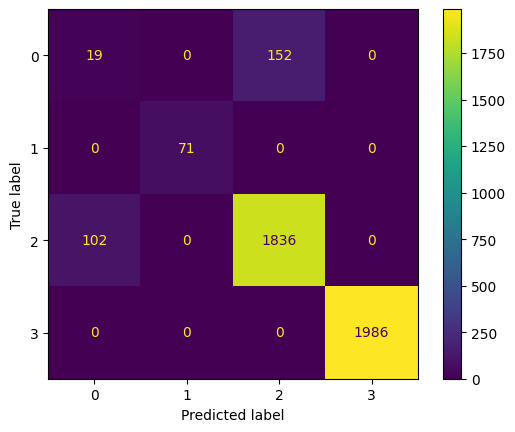

epsilon = 0.01
FPR: [0.01101377 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97729618 1.        ]
FNR: [0.24561404 0.         0.02270382 0.        ]
TNR: [0.98898623 1.         0.98114901 1.        ]
Accuracy: 0.9793566970715314
Precision(micro,macro,weighted): 0.9793566970715314,0.93099263125209,0.9794683826429379
F1(micro,macro,weighted: 0.9793566970715314,0.9319501806917914,0.9794113779939432
Recall(micro,macro,weighted: 0.9793566970715314,0.932920536635707,0.9793566970715314
FPR: 0.007466188660421577
tpr: 0.932920536635707
fnr: 0.06707946336429309
tnr: 0.9925338113395785


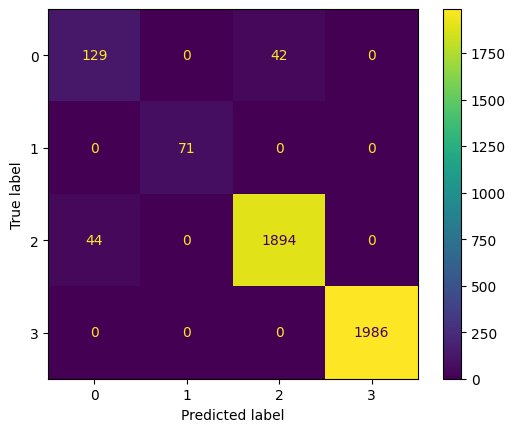

epsilon = 0.1
FPR: [0.01426783 0.         0.01929982 0.        ]
TPR: [0.74853801 1.         0.97058824 1.        ]
FNR: [0.25146199 0.         0.02941176 0.        ]
TNR: [0.98573217 1.         0.98070018 1.        ]
Accuracy: 0.9759961593855017
Precision(micro,macro,weighted): 0.9759961593855017,0.9173856548856549,0.9769564627221853
F1(micro,macro,weighted: 0.9759961593855017,0.9233019510179856,0.9764246372775244
Recall(micro,macro,weighted: 0.9759961593855017,0.929781561747506,0.9759961593855017
FPR: 0.008391913815069554
tpr: 0.929781561747506
fnr: 0.07021843825249398
tnr: 0.9916080861849305


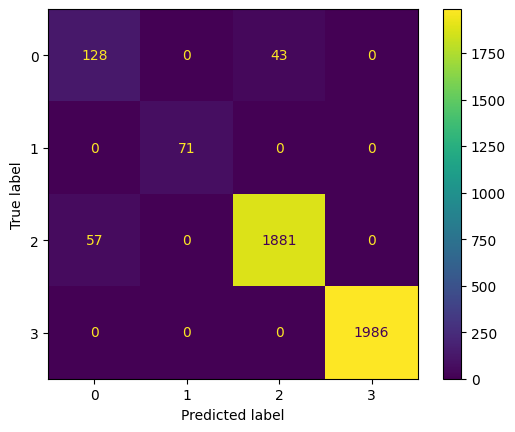

epsilon = 0.2
FPR: [0.01852315 0.         0.05789946 0.        ]
TPR: [0.24561404 1.         0.96181631 1.        ]
FNR: [0.75438596 0.         0.03818369 0.        ]
TNR: [0.98147685 1.         0.94210054 1.        ]
Accuracy: 0.9512722035525684
Precision(micro,macro,weighted): 0.9512722035525684,0.8243356056542727,0.9437046934620635
F1(micro,macro,weighted: 0.9512722035525684,0.8102605307406419,0.9469440476702206
Recall(micro,macro,weighted: 0.9512722035525684,0.8018575851393188,0.9512722035525684
FPR: 0.019105653835696776
tpr: 0.8018575851393188
fnr: 0.19814241486068113
tnr: 0.9808943461643033


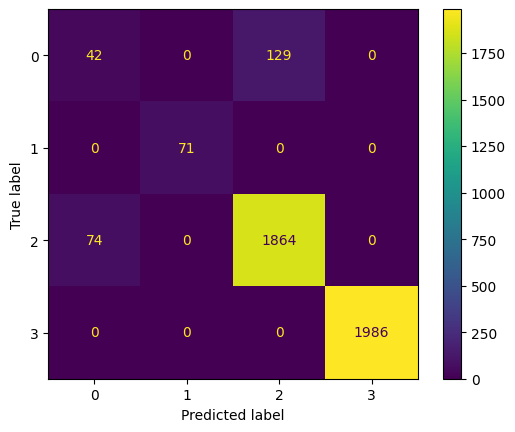

epsilon = 0.3
FPR: [0.02503129 0.         0.06822262 0.        ]
TPR: [0.11111111 1.         0.94840041 1.        ]
FNR: [0.88888889 0.         0.05159959 0.        ]
TNR: [0.97496871 1.         0.93177738 1.        ]
Accuracy: 0.9395103216514642
Precision(micro,macro,weighted): 0.9395103216514642,0.77082048899962,0.9299746472167272
F1(micro,macro,weighted: 0.9395103216514642,0.766719924151977,0.9344874990378403
Recall(micro,macro,weighted: 0.9395103216514642,0.7648778809769522,0.9395103216514642
FPR: 0.02331347757407711
tpr: 0.7648778809769522
fnr: 0.2351221190230478
tnr: 0.9766865224259229


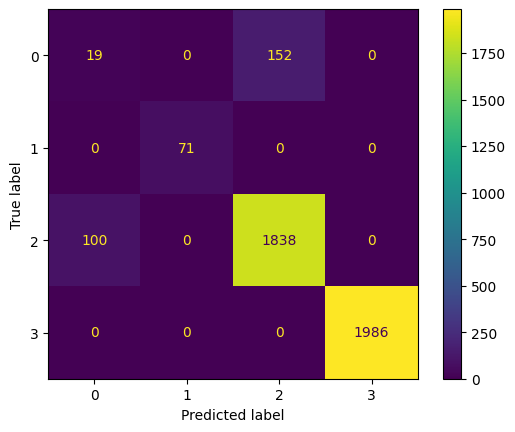

epsilon = 1e-07
FPR: [0.1571965  0.         0.71184919 0.84633028]
TPR: [0.19298246 0.         0.03818369 0.        ]
FNR: [0.80701754 1.         0.96181631 1.        ]
TNR: [0.8428035  1.         0.28815081 0.15366972]
Accuracy: 0.0256841094575132
Precision(micro,macro,weighted): 0.0256841094575132,0.023625667571951954,0.022786806561998902
F1(micro,macro,weighted: 0.0256841094575132,0.030115221597468683,0.022391388561366812
Recall(micro,macro,weighted: 0.0256841094575132,0.05779153766769866,0.0256841094575132
FPR: 0.42884399073735524
tpr: 0.05779153766769866
fnr: 0.9422084623323013
tnr: 0.5711560092626448


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


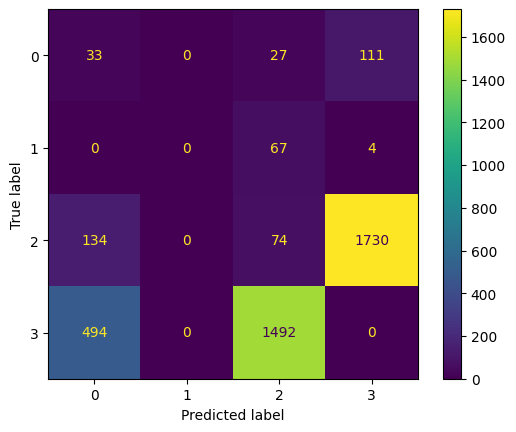

epsilon = 1e-06
FPR: [0.1571965  0.         0.71184919 0.84633028]
TPR: [0.19298246 0.         0.03818369 0.        ]
FNR: [0.80701754 1.         0.96181631 1.        ]
TNR: [0.8428035  1.         0.28815081 0.15366972]
Accuracy: 0.0256841094575132
Precision(micro,macro,weighted): 0.0256841094575132,0.023625667571951954,0.022786806561998902
F1(micro,macro,weighted: 0.0256841094575132,0.030115221597468683,0.022391388561366812
Recall(micro,macro,weighted: 0.0256841094575132,0.05779153766769866,0.0256841094575132
FPR: 0.42884399073735524
tpr: 0.05779153766769866
fnr: 0.9422084623323013
tnr: 0.5711560092626448


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


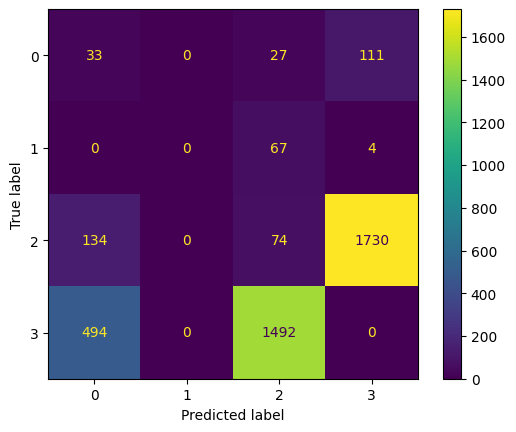

epsilon = 1e-05
FPR: [0.1571965  0.         0.71184919 0.84633028]
TPR: [0.19298246 0.         0.03818369 0.        ]
FNR: [0.80701754 1.         0.96181631 1.        ]
TNR: [0.8428035  1.         0.28815081 0.15366972]
Accuracy: 0.0256841094575132
Precision(micro,macro,weighted): 0.0256841094575132,0.023625667571951954,0.022786806561998902
F1(micro,macro,weighted: 0.0256841094575132,0.030115221597468683,0.022391388561366812
Recall(micro,macro,weighted: 0.0256841094575132,0.05779153766769866,0.0256841094575132
FPR: 0.42884399073735524
tpr: 0.05779153766769866
fnr: 0.9422084623323013
tnr: 0.5711560092626448


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


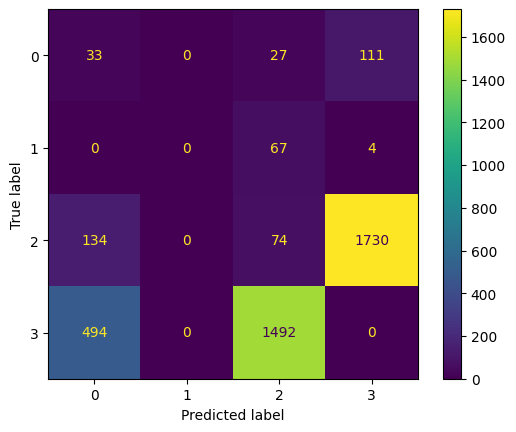

epsilon = 0.0001
FPR: [0.1571965  0.         0.71184919 0.84633028]
TPR: [0.19298246 0.         0.03818369 0.        ]
FNR: [0.80701754 1.         0.96181631 1.        ]
TNR: [0.8428035  1.         0.28815081 0.15366972]
Accuracy: 0.0256841094575132
Precision(micro,macro,weighted): 0.0256841094575132,0.023625667571951954,0.022786806561998902
F1(micro,macro,weighted: 0.0256841094575132,0.030115221597468683,0.022391388561366812
Recall(micro,macro,weighted: 0.0256841094575132,0.05779153766769866,0.0256841094575132
FPR: 0.42884399073735524
tpr: 0.05779153766769866
fnr: 0.9422084623323013
tnr: 0.5711560092626448


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


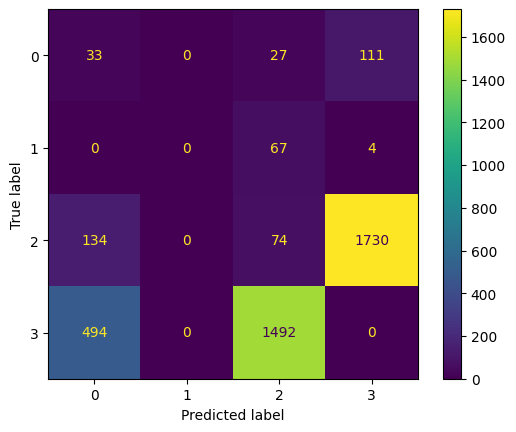

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)